# EYEING TRAFFIC SYSTEMS THROUGH THE LENS OF MACHINE LEARNING

# **Introduction**


Traffic control systems for large urban networks have garnered significant attention in recent years due to the increasing complexity and density of road usage. As cities grow and the number of vehicles on the roads continues to rise, there is a pressing need for efficient and reliable methods that can accurately estimate traffic conditions at any given time in the future. The rise of e-commerce, online food delivery platforms, and hyperlocal services—such as 10-minute delivery promises—has further intensified the demand for robust traffic prediction mechanisms. These services heavily rely on the timely movement of goods and personnel, and even minor delays can impact customer satisfaction and business operations. In such time-sensitive scenarios, the ability to predict future traffic patterns becomes crucial for route optimization, delivery scheduling, and dynamic traffic signal control. To address these challenges, statistical analysis and machine learning offers a powerful approach to model and forecast traffic flow. By leveraging historical traffic data, weather conditions, time-of-day patterns, and other influencing factors, statistical models can uncover trends, correlations, and periodicities that are not immediately visible. These insights enable city planners, logistics companies, and navigation services to make data-driven decisions for efficient traffic management. This study aims to explore and implement statistical techniques for accurate traffic prediction, thereby contributing to smarter urban mobility and enhanced delivery performance.

# DATA DESCRIPTION


This dataset captures detailed traffic patterns across major roads and intersections in Bangalore. It includes metrics such as traffic volume, speed, congestion levels, and environmental impact, providing a comprehensive view of the city's transportation dynamics. Ideal for urban planners and smart city applications.

**Area Name:** The name of the specific locality or region within Bangalore being monitored.

**Road/Intersection Name:** The name or identifier of a particular road segment or traffic intersection.

**Traffic Volume: **The number of vehicles passing through a point or area in a given time period (usually per hour/day).

**Average Speed:** The mean speed of all vehicles traveling through the road or area.

**Travel Time Index:** A ratio that compares the actual travel time to free-flow (no congestion) travel time; higher values indicate more congestion.

**Congestion Level:** A measure (often in percentage) of how crowded or slow-moving the traffic is in a specific area.

**Road Capacity Utilization:** The extent to which the road’s maximum vehicle handling capacity is being used.

**Incident Reports:** Number or types of reported events like accidents, breakdowns, or other disruptions.

**Environmental Impact:** Data on pollution levels (e.g., CO2, noise) associated with traffic in the area.

**Public Transport Usage:** The number of people using public transportation like buses or metro in that area.

**Traffic Signal Compliance:** A metric indicating how well drivers follow traffic signals (e.g., red light violations).

**Parking Usage:** Data on how full public or roadside parking spaces are in the area.

**Pedestrian and Cyclist Count:** The number of pedestrians and cyclists passing through the area.

**Weather Conditions:** Weather data like rain, temperature, fog, etc., which can influence traffic patterns.

**Roadwork and Construction Activity:** Information on ongoing or planned road construction that may impact traffic flow.

In [173]:
!pip install geopandas
!pip install contextily

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
df=pd.read_csv('/content/drive/My Drive/Datasets/Banglore_traffic_Dataset.csv')

In [177]:
df.head()

Date    Area Name Road/Intersection Name  Traffic Volume  \
0  2022-01-01  Indiranagar          100 Feet Road           50590   
1  2022-01-01  Indiranagar               CMH Road           30825   
2  2022-01-01   Whitefield    Marathahalli Bridge            7399   
3  2022-01-01  Koramangala    Sony World Junction           60874   
4  2022-01-01  Koramangala          Sarjapur Road           57292   

   Average Speed  Travel Time Index  Congestion Level  \
0      50.230299           1.500000        100.000000   
1      29.377125           1.500000        100.000000   
2      54.474398           1.039069         28.347994   
3      43.817610           1.500000        100.000000   
4      41.116763           1.500000        100.000000   

   Road Capacity Utilization  Incident Reports  Environmental Impact  \
0                 100.000000                 0               151.180   
1                 100.000000                 1               111.650   
2                  36.396525                 0                64.798   
3                 100.000000                 1               171.748   
4                 100.000000                 3               164.584   

   Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
0               70.632330                  84.044600      85.403629   
1               41.924899                  91.407038      59.983689   
2               44.662384                  61.375541      95.466020   
3               32.773123                  75.547092      63.567452   
4               35.092601                  64.634762      93.155171   

   Pedestrian and Cyclist Count Weather Conditions  \
0                           111              Clear   
1                           100              Clear   
2                           189              Clear   
3                           111              Clear   
4                           104              Clear   

  Roadwork and Construction Activity  
0                                 No  
1                                 No  
2                                 No  
3                                 No  
4                                 No

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [179]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day_name()
df.head()
df.drop(columns=['Date'])

Area Name Road/Intersection Name  Traffic Volume  Average Speed  \
0         Indiranagar          100 Feet Road           50590      50.230299   
1         Indiranagar               CMH Road           30825      29.377125   
2          Whitefield    Marathahalli Bridge            7399      54.474398   
3         Koramangala    Sony World Junction           60874      43.817610   
4         Koramangala          Sarjapur Road           57292      41.116763   
...               ...                    ...             ...            ...   
8931  Electronic City             Hosur Road           11387      23.440276   
8932        M.G. Road         Trinity Circle           36477      45.168429   
8933        M.G. Road     Anil Kumble Circle           42822      22.028609   
8934        Jayanagar       South End Circle           20540      52.254798   
8935     Yeshwanthpur    Yeshwanthpur Circle           14705      31.128967   

      Travel Time Index  Congestion Level  Road Capacity Utilization  \
0              1.500000        100.000000                 100.000000   
1              1.500000        100.000000                 100.000000   
2              1.039069         28.347994                  36.396525   
3              1.500000        100.000000                 100.000000   
4              1.500000        100.000000                 100.000000   
...                 ...               ...                        ...   
8931           1.262384         35.871483                  57.354487   
8932           1.500000        100.000000                 100.000000   
8933           1.500000        100.000000                 100.000000   
8934           1.020520         72.639152                  97.845527   
8935           1.048720         43.409821                  77.734621   

      Incident Reports  Environmental Impact  Public Transport Usage  \
0                    0               151.180               70.632330   
1                    1               111.650               41.924899   
2                    0                64.798               44.662384   
3                    1               171.748               32.773123   
4                    3               164.584               35.092601   
...                ...                   ...                     ...   
8931                 1                72.774               21.523289   
8932                 3               122.954               29.822312   
8933                 1               135.644               43.185905   
8934                 2                91.080               44.416043   
8935                 1                79.410               26.616725   

      Traffic Signal Compliance  Parking Usage  Pedestrian and Cyclist Count  \
0                     84.044600      85.403629                           111   
1                     91.407038      59.983689                           100   
2                     61.375541      95.466020                           189   
3                     75.547092      63.567452                           111   
4                     64.634762      93.155171                           104   
...                         ...            ...                           ...   
8931                  83.530352      97.898279                           211   
8932                  60.738488      60.355967                            95   
8933                  85.321627      61.333731                           110   
8934                  89.586947      79.197198                            94   
8935                  80.778753      60.602672                           201   

     Weather Conditions Roadwork and Construction Activity       Day  
0                 Clear                                 No  Saturday  
1                 Clear                                 No  Saturday  
2                 Clear                                 No  Saturday  
3                 Clear                                 No  Saturday  
4                

**EXPLORATORY DATA ANALYSIS**

In [180]:
df['Road/Intersection Name'].value_counts()

Road/Intersection Name
100 Feet Road          860
CMH Road               860
Anil Kumble Circle     759
Trinity Circle         742
Sony World Junction    684
Sarjapur Road          680
South End Circle       593
Jayanagar 4th Block    580
Marathahalli Bridge    492
Ballari Road           476
Hebbal Flyover         474
ITPL Main Road         450
Yeshwanthpur Circle    373
Tumkur Road            361
Hosur Road             277
Silk Board Junction    275
Name: count, dtype: int64

In [181]:
df['Area Name'].unique()

array(['Indiranagar', 'Whitefield', 'Koramangala', 'M.G. Road',
       'Jayanagar', 'Hebbal', 'Yeshwanthpur', 'Electronic City'],
      dtype=object)

**VISUALIZING ROAD CONNECTIVITY THROUGH GOOGLE MAPS**

In [182]:
!pip install osmnx
!pip install shapely.geometry

ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry


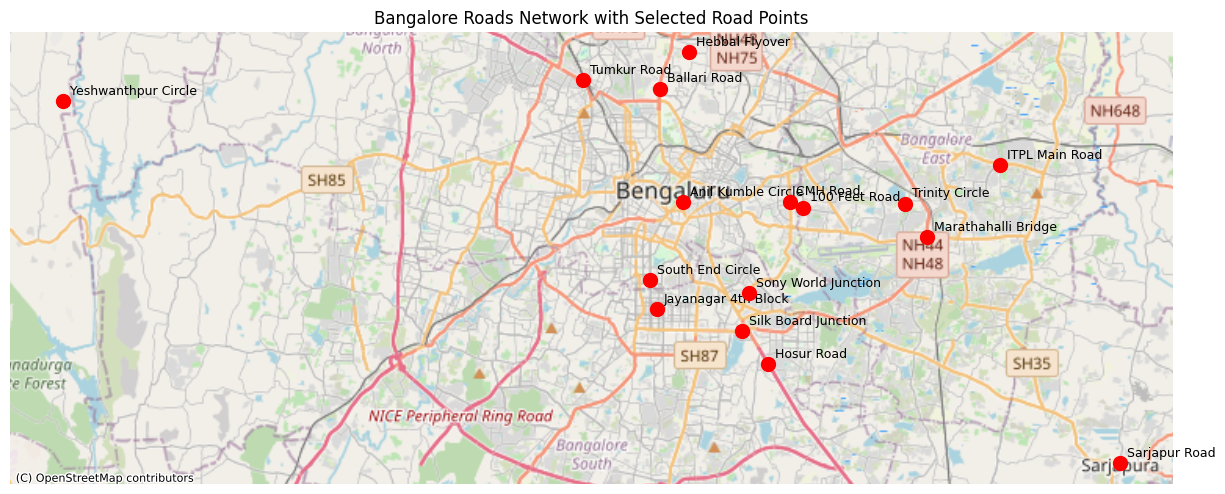

In [183]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox
from shapely.geometry import Point

road_names = ['100 Feet Road', 'CMH Road', 'Marathahalli Bridge',
       'Sony World Junction', 'Sarjapur Road', 'Trinity Circle',
       'Anil Kumble Circle', 'Jayanagar 4th Block', 'South End Circle',
       'Hebbal Flyover', 'Ballari Road', 'Yeshwanthpur Circle',
       'Tumkur Road', 'ITPL Main Road', 'Silk Board Junction',
       'Hosur Road']

road_coords = {
    '100 Feet Road': (12.9694, 77.6471),
    'CMH Road': (12.9719, 77.6412),
    'Marathahalli Bridge': (12.9569, 77.7015),
    'Sony World Junction': (12.9329, 77.6233),
    'Sarjapur Road': (12.860, 77.786),
    'Trinity Circle': (12.9711, 77.6917),
    'Anil Kumble Circle': (12.9716, 77.5946),
    'Jayanagar 4th Block': (12.9259, 77.5830),
    'South End Circle': (12.9383, 77.5801),
    'Hebbal Flyover': (13.035781, 77.597008),
    'Ballari Road': (13.0202, 77.5843),
    'Yeshwanthpur Circle': (13.0148, 77.3225),
    'Tumkur Road': (13.023725, 77.550724),
    'ITPL Main Road': (12.9876, 77.7334),
    'Silk Board Junction': (12.91652, 77.62056),
    'Hosur Road': (12.9025268, 77.631783)
}

# Prepare points GeoDataFrame
geometry = [Point(lon, lat) for lat, lon in road_coords.values()]
gdf_points = gpd.GeoDataFrame({'Road/Intersection Name': list(road_coords.keys())}, geometry=geometry, crs="EPSG:4326")

# Download road network of Bangalore with osmnx (within bounding box)
place = "Bangalore, India"
G = ox.graph_from_place(place, network_type='drive')  # drivable roads

# Convert graph to GeoDataFrame of edges (roads)
gdf_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)[['geometry']]

# Reproject all to Web Mercator for plotting with basemap
gdf_edges = gdf_edges.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
# gdf_edges.plot(ax=ax, linewidth=1, edgecolor='gray', alpha=0.7)
gdf_points.plot(ax=ax, color='red', markersize=100, zorder=5)

for x, y, label in zip(gdf_points.geometry.x, gdf_points.geometry.y, gdf_points['Road/Intersection Name']):
    ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Bangalore Roads Network with Selected Road Points")
ax.axis('off')  # Optional: hides axis for cleaner look
plt.show()


**NUMERICAL DESCRIPTION OF DATASET**

In [184]:
df.describe()

Date  Traffic Volume  Average Speed  \
count                           8936     8936.000000    8936.000000   
mean   2023-04-22 05:25:11.548791552    29236.048120      39.447427   
min              2022-01-01 00:00:00     4233.000000      20.000000   
25%              2022-08-26 00:00:00    19413.000000      31.775825   
50%              2023-04-24 00:00:00    27600.000000      39.199368   
75%              2023-12-17 06:00:00    38058.500000      46.644517   
max              2024-08-09 00:00:00    72039.000000      89.790843   
std                              NaN    13001.808801      10.707244   

       Travel Time Index  Congestion Level  Road Capacity Utilization  \
count        8936.000000       8936.000000                8936.000000   
mean            1.375554         80.818041                  92.029215   
min             1.000039          5.160279                  18.739771   
25%             1.242459         64.292905                  97.354990   
50%             1.500000         92.389018                 100.000000   
75%             1.500000        100.000000                 100.000000   
max             1.500000        100.000000                 100.000000   
std             0.165319         23.533182                  16.583341   

       Incident Reports  Environmental Impact  Public Transport Usage  \
count       8936.000000           8936.000000             8936.000000   
mean           1.570389            108.472096               45.086651   
min            0.000000             58.466000               10.006853   
25%            0.000000             88.826000               27.341191   
50%            1.000000            105.200000               45.170684   
75%            2.000000            126.117000               62.426485   
max           10.000000            194.078000               79.979744   
std            1.420047             26.003618               20.208460   

       Traffic Signal Compliance  Parking Usage  Pedestrian and Cyclist Count  
count                8936.000000    8936.000000                   8936.000000  
mean                   79.950243      75.155597                    114.533348  
min                    60.003933      50.020411                     66.000000  
25%                    69.828270      62.545895                     94.000000  
50%                    79.992773      75.317610                    102.000000  
75%                    89.957358      87.518589                    111.000000  
max                    99.993652      99.995049                    243.000000  
std                    11.585006      14.409394                     36.812573

In [185]:
df.corr(numeric_only=True)

Traffic Volume  Average Speed  \
Traffic Volume                      1.000000      -0.341138   
Average Speed                      -0.341138       1.000000   
Travel Time Index                   0.697514      -0.376170   
Congestion Level                    0.837218      -0.360250   
Road Capacity Utilization           0.652898      -0.249886   
Incident Reports                    0.338766      -0.158863   
Environmental Impact                1.000000      -0.341138   
Public Transport Usage             -0.001160       0.024437   
Traffic Signal Compliance           0.005035       0.000644   
Parking Usage                      -0.025828       0.000161   
Pedestrian and Cyclist Count       -0.554718       0.209209   

                              Travel Time Index  Congestion Level  \
Traffic Volume                         0.697514          0.837218   
Average Speed                         -0.376170         -0.360250   
Travel Time Index                      1.000000          0.751573   
Congestion Level                       0.751573          1.000000   
Road Capacity Utilization              0.507774          0.865025   
Incident Reports                       0.322942          0.418284   
Environmental Impact                   0.697514          0.837218   
Public Transport Usage                -0.002011         -0.002783   
Traffic Signal Compliance             -0.001240          0.001810   
Parking Usage                         -0.022570         -0.025815   
Pedestrian and Cyclist Count          -0.422007         -0.738787   

                              Road Capacity Utilization  Incident Reports  \
Traffic Volume                                 0.652898          0.338766   
Average Speed                                 -0.249886         -0.158863   
Travel Time Index                              0.507774          0.322942   
Congestion Level                               0.865025          0.418284   
Road Capacity Utilization                      1.000000          0.349976   
Incident Reports                               0.349976          1.000000   
Environmental Impact                           0.652898          0.338766   
Public Transport Usage                         0.000443         -0.003811   
Traffic Signal Compliance                      0.017135         -0.003002   
Parking Usage                                 -0.030358         -0.016150   
Pedestrian and Cyclist Count                  -0.868422         -0.289087   

                              Environmental Impact  Public Transport Usage  \
Traffic Volume                            1.000000               -0.001160   
Average Speed                            -0.341138                0.024437   
Travel Time Index                         0.697514               -0.002011   
Congestion Level                          0.837218               -0.002783   
Road Capacity Utilization                 0.652898                0.000443   
Incident Reports                          0.338766               -0.003811   
Environmental Impact                      1.000000               -0.001160   
Public Transport Usage                   -0.001160                1.000000   
Traffic Signal Compliance                 0.005035               -0.012765   
Parking Usage                            -0.025828                0.017501   
Pedestrian and Cyclist Count             -0.554718                0.002481   

                              Traffic Signal Compliance  Parking Usage  \
Traffic Volume                                 0.005035      -0.025828   
Average Speed                                  0.000644       0.000161   
Travel Time Index                             -0.001240      -0.022570   
Congestion Level                               0.001810      -0.025815   
Road Capacity Utilization                      0.017135      -0.030358   
Incident Reports                              -0.003002      -0.016150   
Environmental Impact                           0.005035      -0.

<Axes: >

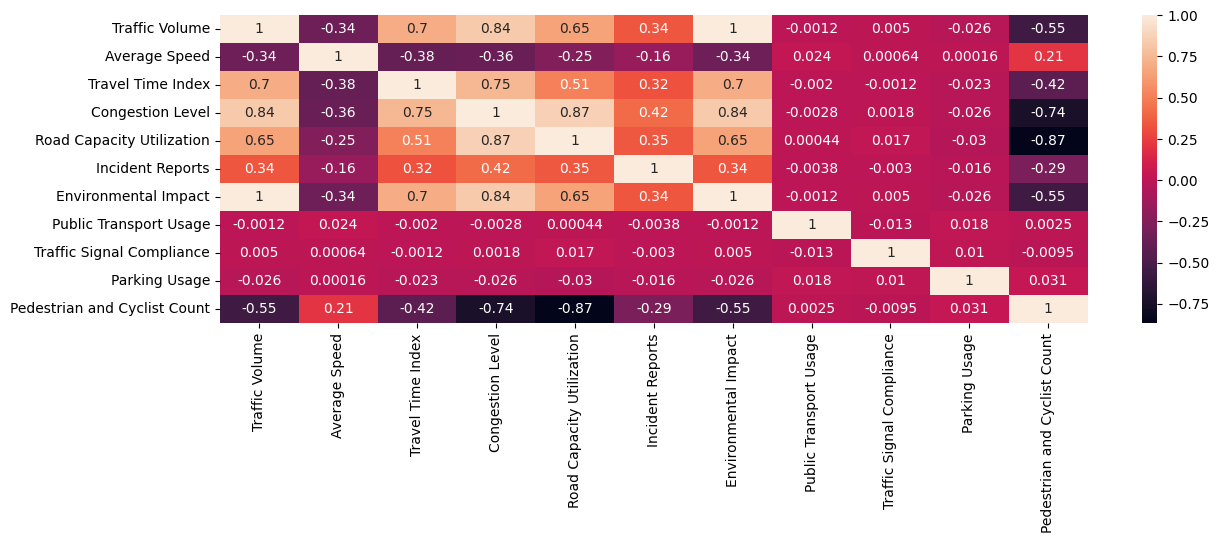

In [186]:
plt.figure(figsize=(14,4)) #plotting correlation heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)


We interpret that there is high correlation between congestion level and traffic volume and congestion level also has high correlation with factors such as travel time,average speed,environmental effect .

**UNIVARIATE EDA**

> Add blockquote



In [187]:
def univariate_plot(column): #Function for plotting distributions
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.histplot(df[column],kde=True,bins=20)
  plt.subplot(1,2,2)
  sns.boxplot(df[column])
  plt.tight_layout()
  plt.show()

***PLOTTING OUR TARGET VARIABLE FIRST***

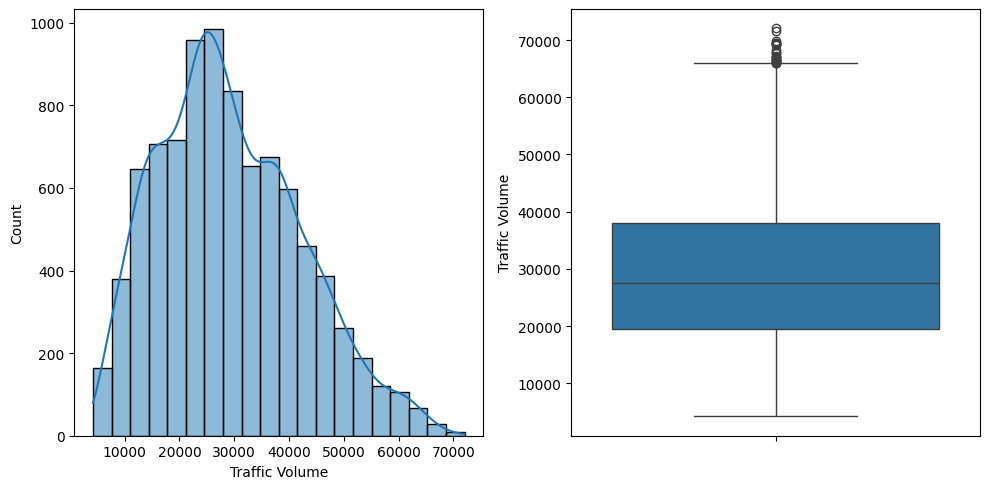

In [188]:
univariate_plot('Traffic Volume')

***PLOTTING OTHER FEATURES***

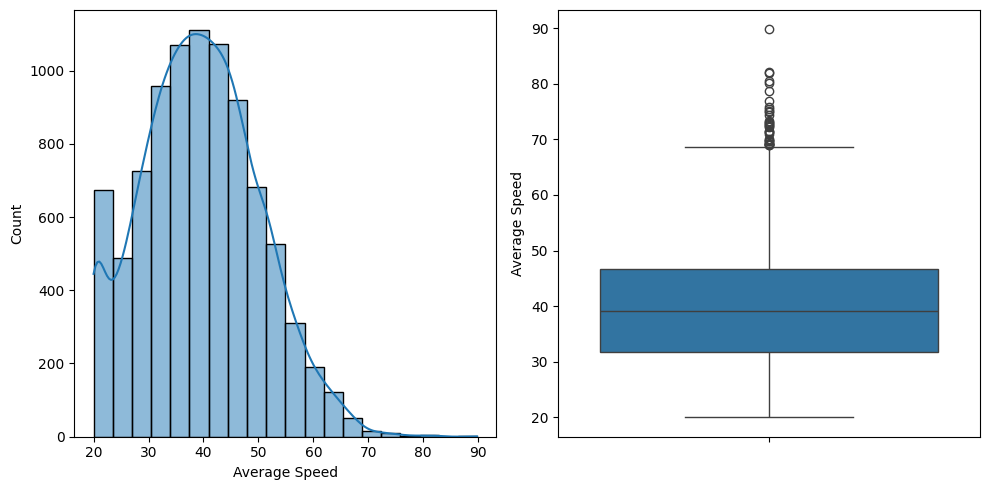

In [189]:
univariate_plot('Average Speed')

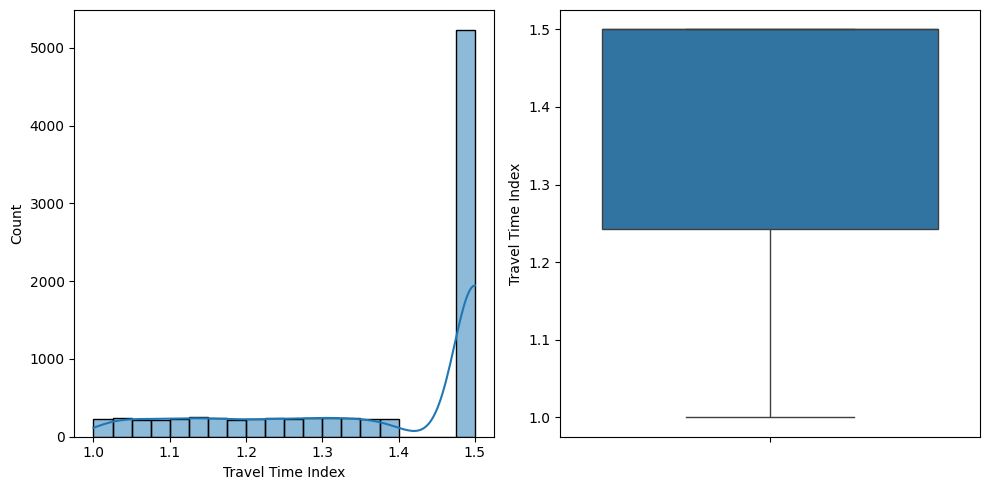

In [190]:
univariate_plot('Travel Time Index')

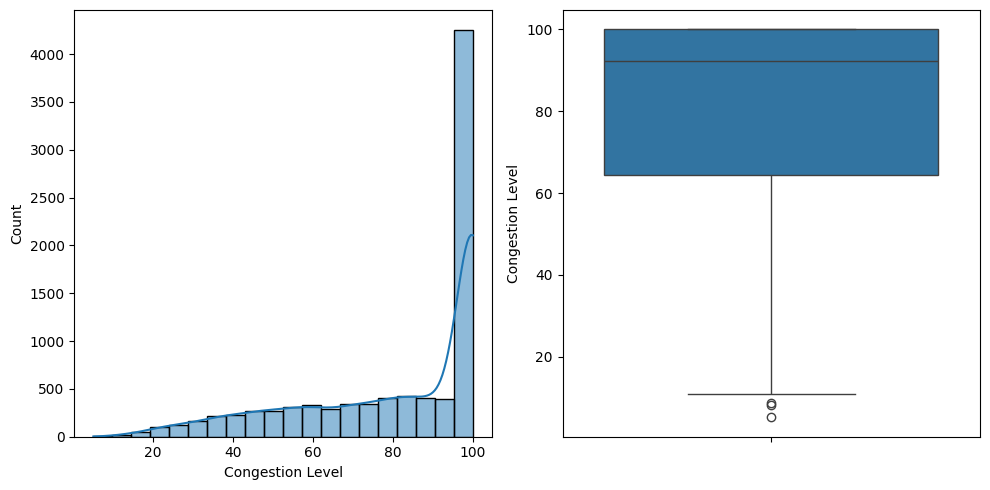

In [191]:
univariate_plot('Congestion Level')

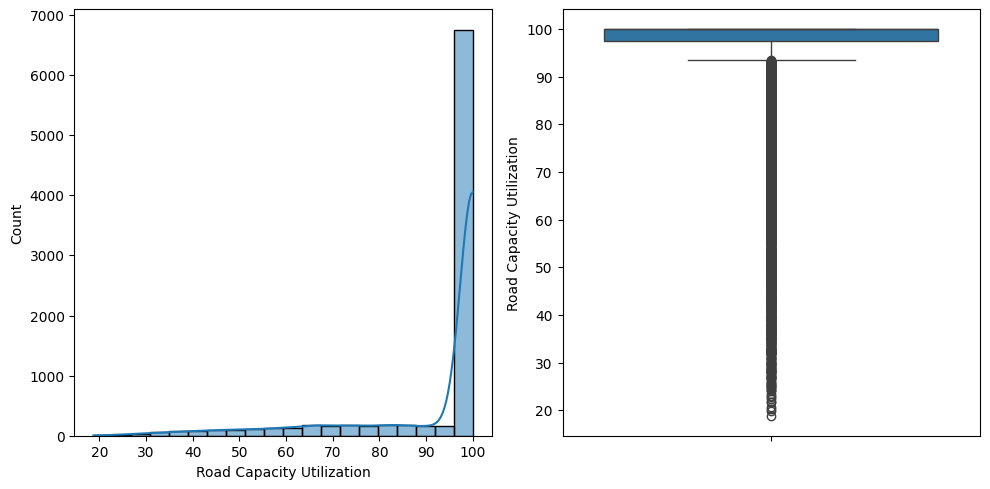

In [192]:
univariate_plot('Road Capacity Utilization')

<Axes: xlabel='Incident Reports'>

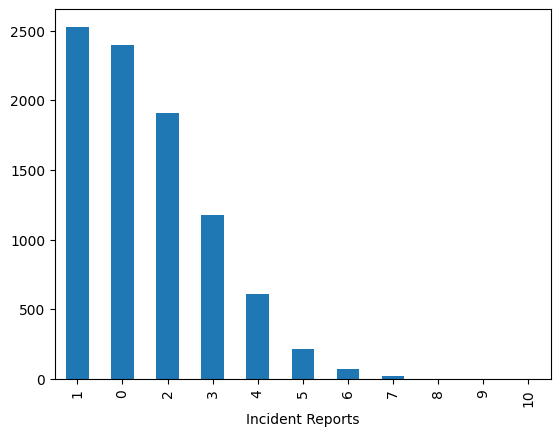

In [193]:
df['Incident Reports'].value_counts().plot(kind='bar') #For Plotting Bar of Incident Report counts

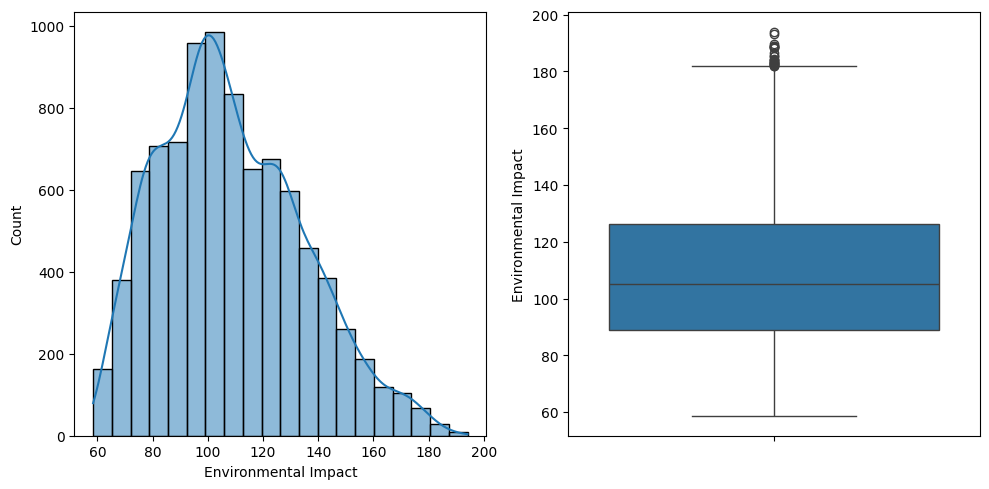

In [194]:
univariate_plot('Environmental Impact')

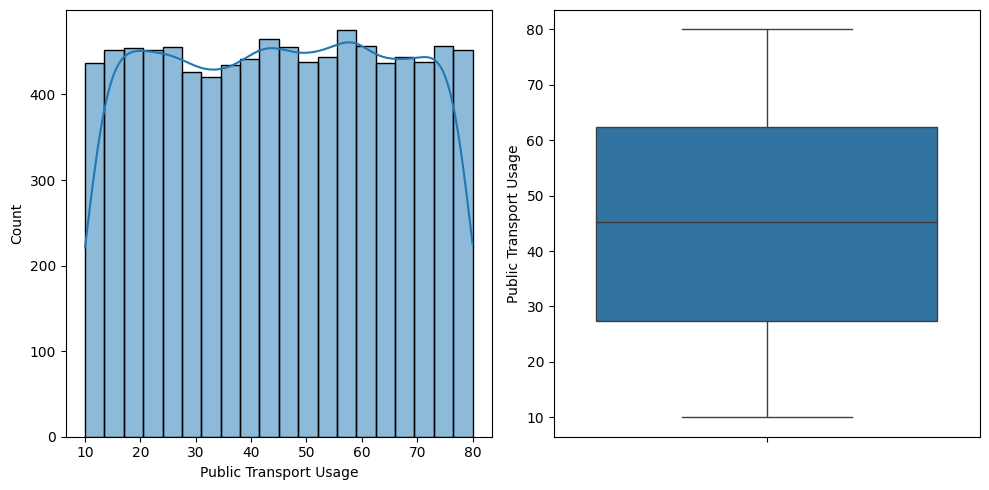

In [195]:
univariate_plot('Public Transport Usage')

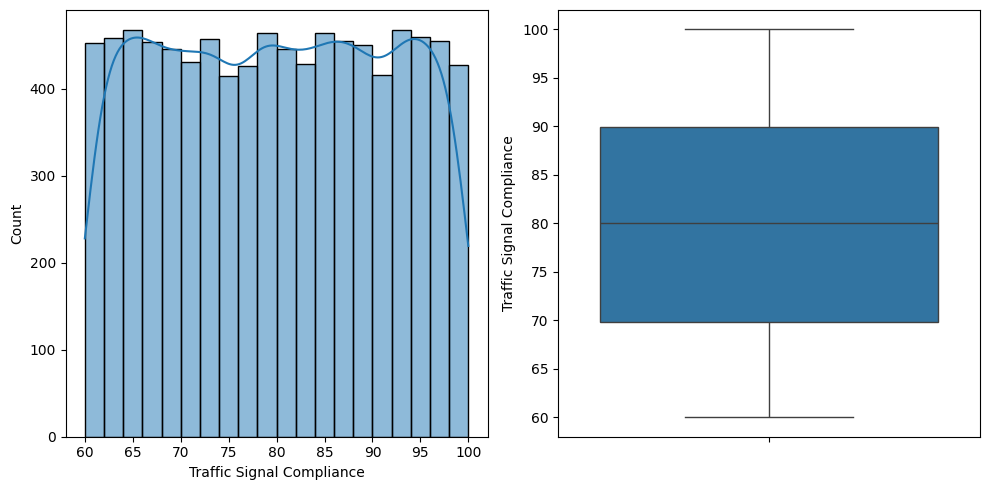

In [196]:
univariate_plot('Traffic Signal Compliance')

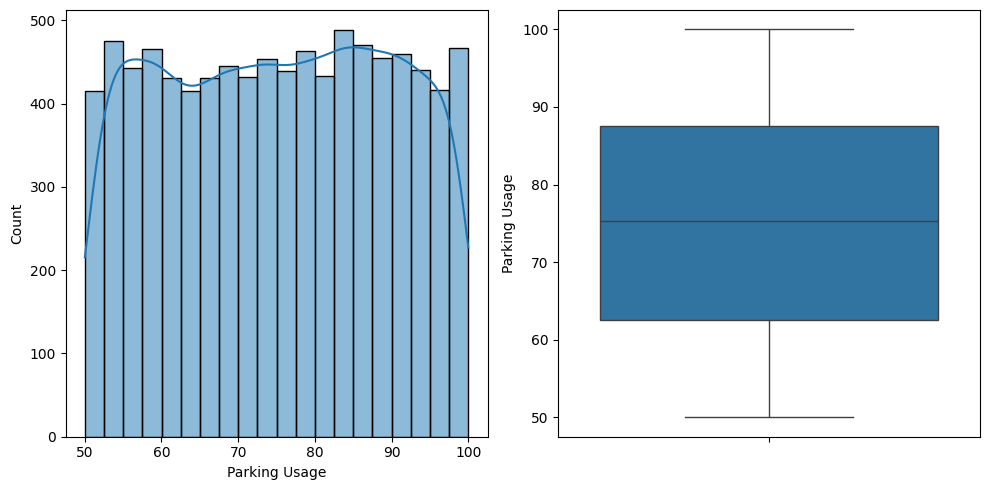

In [197]:
univariate_plot('Parking Usage')

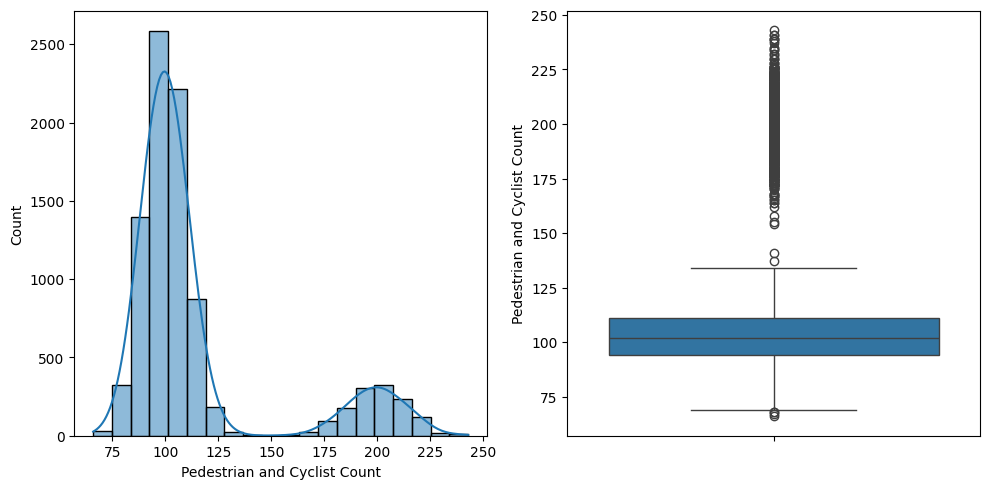

In [198]:
univariate_plot('Pedestrian and Cyclist Count')

In [199]:
df['Weather Conditions'].value_counts() #Gives Weather report of each Day

Weather Conditions
Clear       5426
Overcast    1296
Fog          959
Rain         827
Windy        428
Name: count, dtype: int64

In [200]:
df['Roadwork and Construction Activity'].value_counts() #Tells whether some kind of construction is taking place on the road

Roadwork and Construction Activity
No     8054
Yes     882
Name: count, dtype: int64

**BIVARIATE EDA**

In [201]:
#Checking Corelation of Numeric columns with our target Variable
df.corr(numeric_only=True)['Traffic Volume'].drop('Traffic Volume',axis=0).sort_values(ascending=True)

Pedestrian and Cyclist Count   -0.554718
Average Speed                  -0.341138
Parking Usage                  -0.025828
Public Transport Usage         -0.001160
Traffic Signal Compliance       0.005035
Incident Reports                0.338766
Road Capacity Utilization       0.652898
Travel Time Index               0.697514
Congestion Level                0.837218
Environmental Impact            1.000000
Name: Traffic Volume, dtype: float64

In [202]:
def scatter_diag(column):
  sns.scatterplot(data=df,x=column,y='Traffic Volume',hue='Road/Intersection Name')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

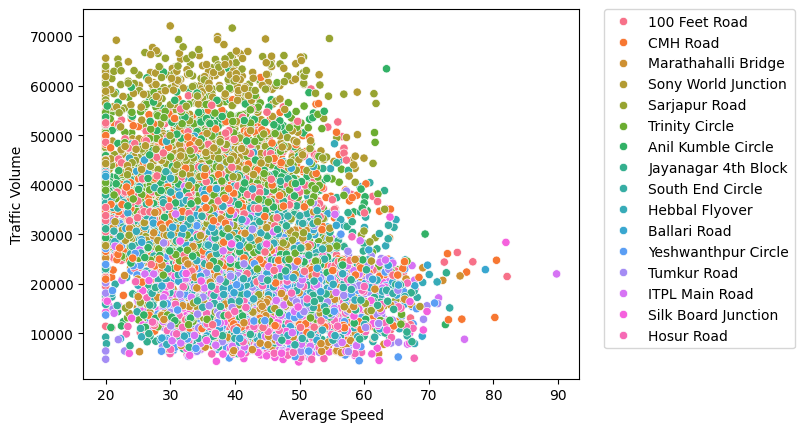

In [203]:
scatter_diag('Average Speed')

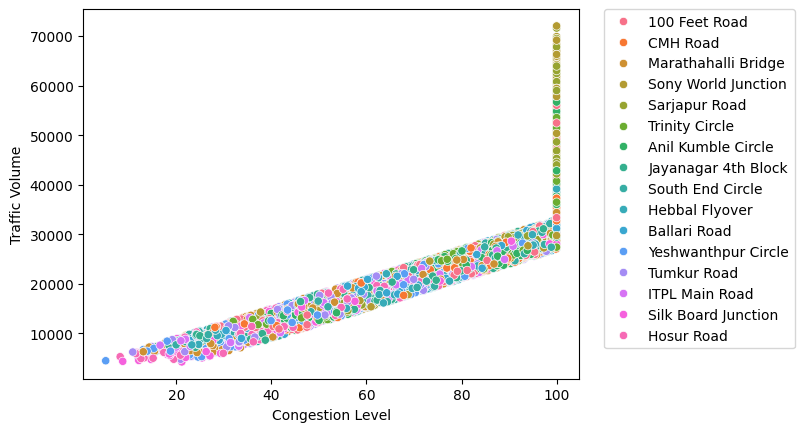

In [204]:
scatter_diag('Congestion Level')

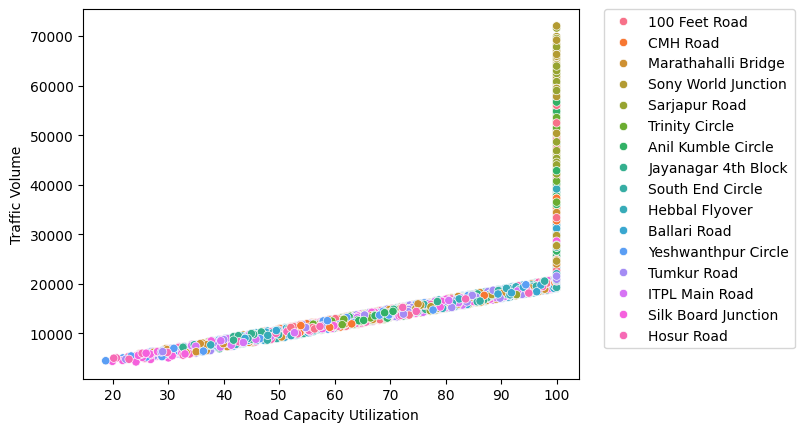

In [205]:
scatter_diag('Road Capacity Utilization')

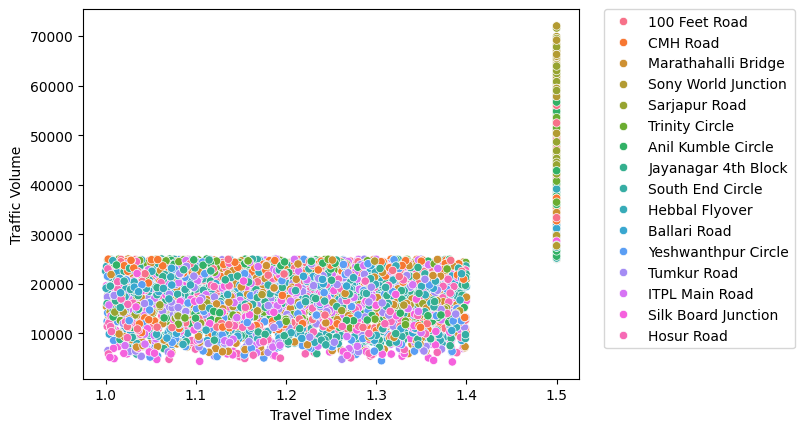

In [206]:
scatter_diag('Travel Time Index')

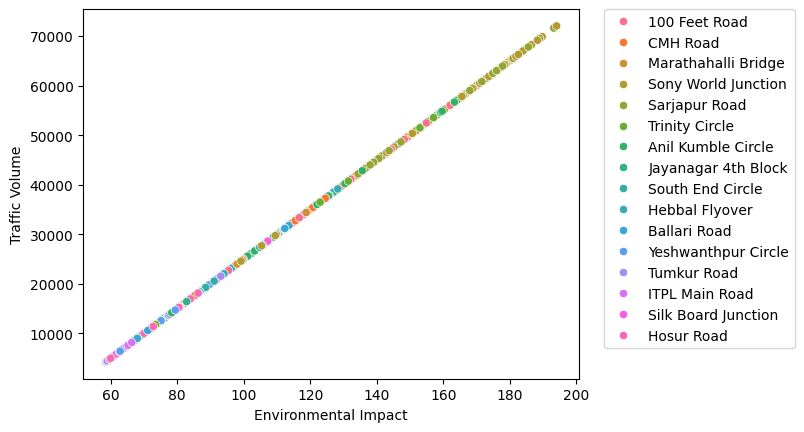

In [207]:
scatter_diag('Environmental Impact') #Complete Linear Relationship,Signs of Data Leakage ,need to drop this column.

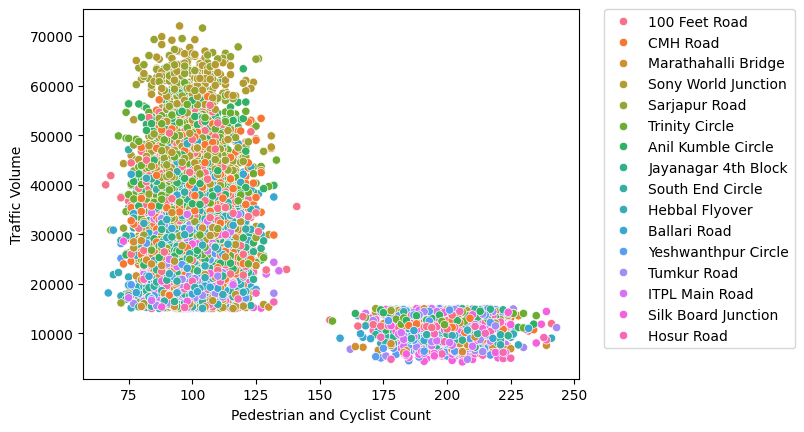

In [208]:
scatter_diag('Pedestrian and Cyclist Count')

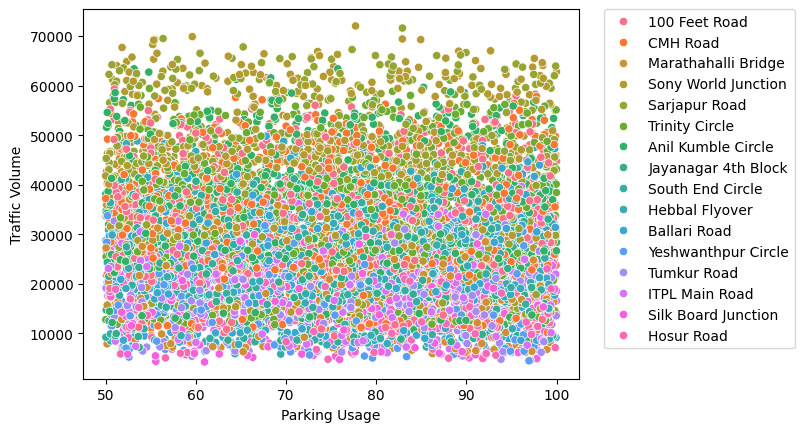

In [209]:
scatter_diag('Parking Usage')

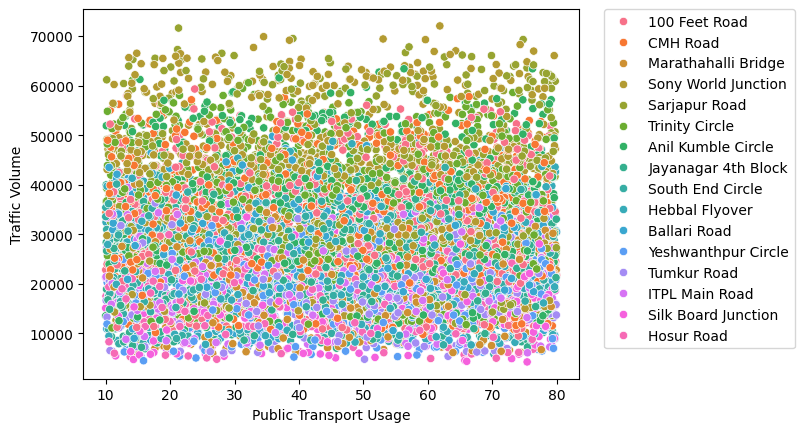

In [210]:
scatter_diag('Public Transport Usage')

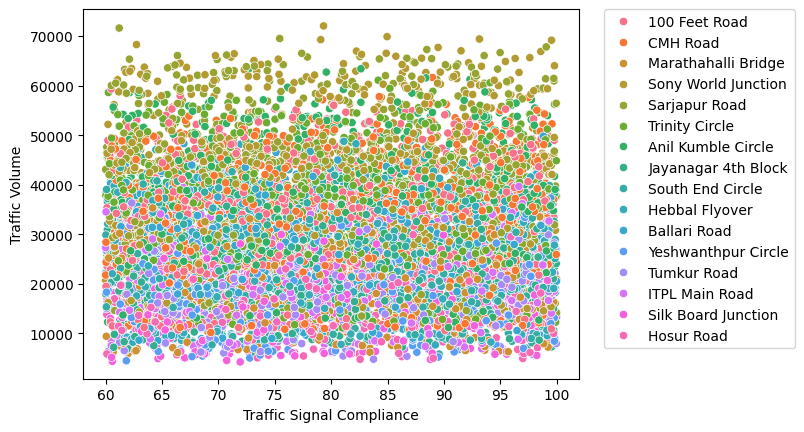

In [211]:
scatter_diag('Traffic Signal Compliance')

**Plotting Our Target Variable in terms of Categorical Features**

In [212]:
def dist_plot(column):
  sns.histplot(data=df,x='Traffic Volume',hue=column,multiple='stack',kde=True)
  plt.show()

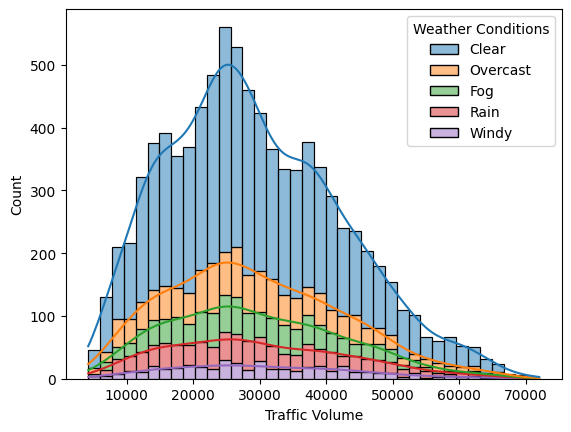

In [213]:
dist_plot('Weather Conditions')

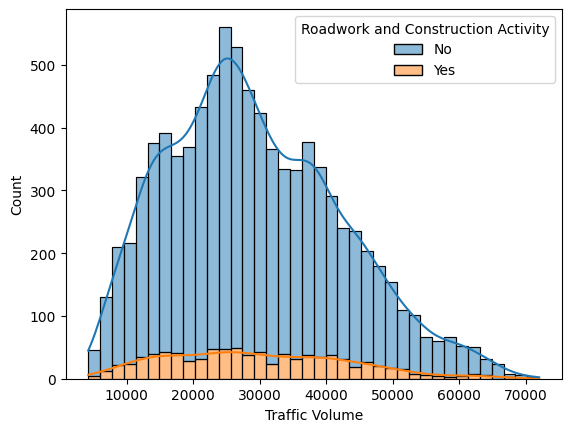

In [214]:
dist_plot('Roadwork and Construction Activity')

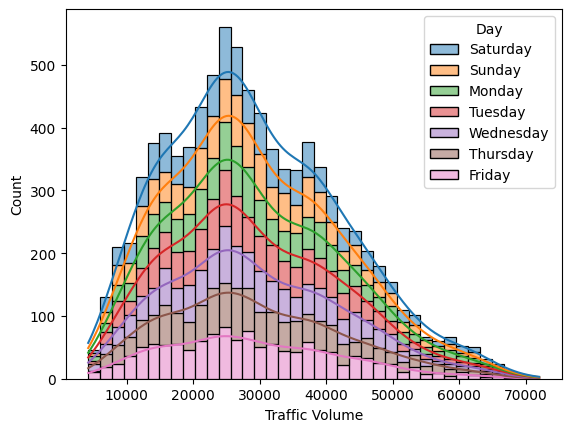

In [215]:
dist_plot('Day')

In [216]:
x=df.groupby('Road/Intersection Name')['Traffic Volume'].mean()

In [217]:
x.values

array([31956.85232558, 35251.828722  , 26272.6407563 , 32611.9244186 ,
       26794.92405063, 16557.22382671, 21866.03777778, 24496.2362069 ,
       20772.95325203, 40189.95      , 16134.53454545, 41470.80116959,
       24704.11973019, 35350.13746631, 18574.49030471, 19277.1152815 ])

In [218]:
x.index

Index(['100 Feet Road', 'Anil Kumble Circle', 'Ballari Road', 'CMH Road',
       'Hebbal Flyover', 'Hosur Road', 'ITPL Main Road', 'Jayanagar 4th Block',
       'Marathahalli Bridge', 'Sarjapur Road', 'Silk Board Junction',
       'Sony World Junction', 'South End Circle', 'Trinity Circle',
       'Tumkur Road', 'Yeshwanthpur Circle'],
      dtype='object', name='Road/Intersection Name')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '100 Feet Road'),
  Text(1, 0, 'Anil Kumble Circle'),
  Text(2, 0, 'Ballari Road'),
  Text(3, 0, 'CMH Road'),
  Text(4, 0, 'Hebbal Flyover'),
  Text(5, 0, 'Hosur Road'),
  Text(6, 0, 'ITPL Main Road'),
  Text(7, 0, 'Jayanagar 4th Block'),
  Text(8, 0, 'Marathahalli Bridge'),
  Text(9, 0, 'Sarjapur Road'),
  Text(10, 0, 'Silk Board Junction'),
  Text(11, 0, 'Sony World Junction'),
  Text(12, 0, 'South End Circle'),
  Text(13, 0, 'Trinity Circle'),
  Text(14, 0, 'Tumkur Road'),
  Text(15, 0, 'Yeshwanthpur Circle')])

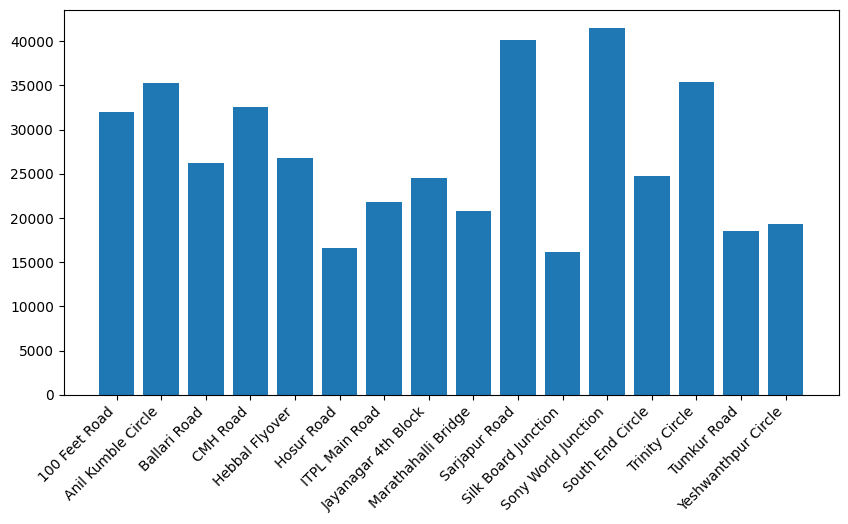

In [219]:
#Plotting Mean Traffic Volume of Each Roads
plt.figure(figsize=(10,5))
plt.bar(x.index,x.values)
plt.xticks(rotation=45,ha='right')

In [220]:
y=df.groupby('Area Name')['Traffic Volume'].mean()

In [221]:
y.values

array([16346.64492754, 26533.23263158, 32284.38837209, 24601.32992327,
       40832.25366569, 35300.42638241, 21295.12738854, 18931.54632153])

In [222]:
y.index

Index(['Electronic City', 'Hebbal', 'Indiranagar', 'Jayanagar', 'Koramangala',
       'M.G. Road', 'Whitefield', 'Yeshwanthpur'],
      dtype='object', name='Area Name')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Electronic City'),
  Text(1, 0, 'Hebbal'),
  Text(2, 0, 'Indiranagar'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'Koramangala'),
  Text(5, 0, 'M.G. Road'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'Yeshwanthpur')])

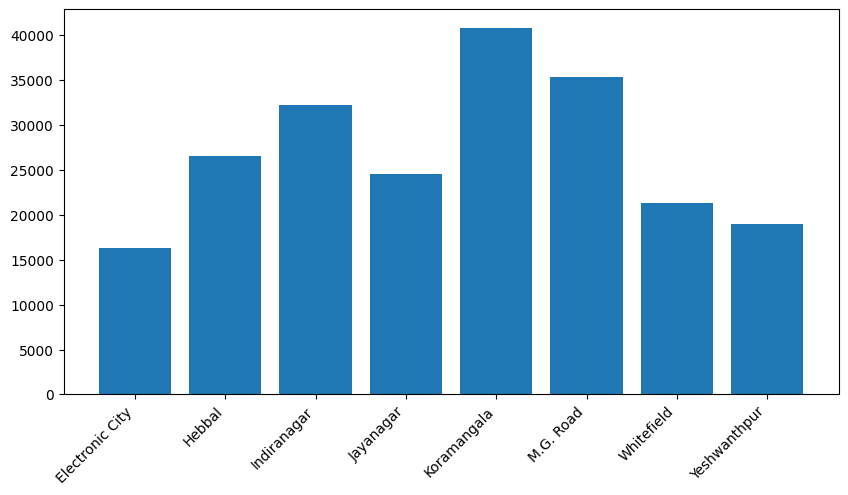

In [223]:
#Plot of all Areas
plt.figure(figsize=(10,5))
plt.bar(y.index,y.values)
plt.xticks(rotation=45,ha='right')

**DATA PREPROCESSING**


In this section , we did some preprocessing of our data.Since there are no missing values and duplicate values ,hence we only perform transformation on our numerical columns in order to normalise them( since we are using linear models) and perform encoding on our categorical columns.

In [224]:
#Extracting Numerical Columns from the data set and converting it in a form of a list
num_cols=df.select_dtypes(include='number').columns.to_list()
num_cols=num_cols[1:]
num_cols.remove('Environmental Impact')
num_cols

['Average Speed',
 'Travel Time Index',
 'Congestion Level',
 'Road Capacity Utilization',
 'Incident Reports',
 'Public Transport Usage',
 'Traffic Signal Compliance',
 'Parking Usage',
 'Pedestrian and Cyclist Count']

In [225]:
#Extracting Categorical Columns from the data set and converting it in a form of a list
cat_cols=df.select_dtypes(include='object').columns.to_list()
cat_cols

['Area Name',
 'Road/Intersection Name',
 'Weather Conditions',
 'Roadwork and Construction Activity',
 'Day']

In [226]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression ,BayesianRidge
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [227]:
def handling_outliers(X): #Creating Function for Handling Outliers ( We use Capping Method)
  X_copy = X.copy()
  for column in num_cols:
    q1=X_copy[column].quantile(0.25)
    q3=X_copy[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    X_copy[column]=np.where(X_copy[column]>upper_bound,upper_bound,X_copy[column])
    X_copy[column]=np.where(X_copy[column]<lower_bound,lower_bound,X_copy[column])
  return X_copy

In [228]:
trf1=FunctionTransformer(handling_outliers) #Handles Outliers

In [229]:
trf2=ColumnTransformer(transformers=        #Yeo Jhonson Transform on Numerical Coulumns and One Hot Encoding in Categorical Columns
 [('YJ_transform',PowerTransformer(),num_cols),
   ('Ohe_cat' , OneHotEncoder(sparse_output=False,drop='first') , cat_cols)  ]
                       ,remainder='passthrough')

**FITTING LINEAR REGRESSION:-**

In [230]:
trf3=LinearRegression() #Fitting Model

In [231]:
pipe1 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [232]:
X=df.drop(columns=['Date','Traffic Volume','Environmental Impact'])
y=df['Traffic Volume']

In [233]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [234]:
X_train.head()

Area Name Road/Intersection Name  Average Speed  \
4368        M.G. Road     Anil Kumble Circle      29.926926   
5668      Indiranagar               CMH Road      32.543331   
4565        Jayanagar       South End Circle      31.336864   
5311        M.G. Road     Anil Kumble Circle      30.065068   
4672  Electronic City             Hosur Road      43.166176   

      Travel Time Index  Congestion Level  Road Capacity Utilization  \
4368           1.500000        100.000000                 100.000000   
5668           1.500000         98.149340                 100.000000   
4565           1.500000         98.577720                 100.000000   
5311           1.500000        100.000000                 100.000000   
4672           1.185561         61.812002                  99.481415   

      Incident Reports  Public Transport Usage  Traffic Signal Compliance  \
4368                 0               24.527118                  64.385581   
5668                 2               17.045267                  84.321803   
4565                 3               75.032815                  84.744039   
5311                 1               21.127721                  88.283278   
4672                 1               59.550953                  73.550298   

      Parking Usage  Pedestrian and Cyclist Count Weather Conditions  \
4368      63.881665                            89               Rain   
5668      75.542172                           105              Windy   
4565      89.052357                            84              Clear   
5311      84.456476                           100           Overcast   
4672      95.751552                            86                Fog   

     Roadwork and Construction Activity        Day  
4368                                 No   Thursday  
5668                                 No  Wednesday  
4565                                Yes     Friday  
5311                                 No    Tuesday  
4672                                 No  Wednesday

In [235]:
pipe1.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('YJ_transform',
                                                  PowerTransformer(),
                                                  ['Average Speed',
                                                   'Travel Time Index',
                                                   'Congestion Level',
                                                   'Road Capacity Utilization',
                                                   'Incident Reports',
                                                   'Public Transport Usage',
                                                   'Traffic Signal Compliance',
                                                   'Parking Usage',
                                                   'Pedestrian and Cyclist '
                                                   'Count']),
                                                 ('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('trf3', LinearRegression())])

In [236]:
y_pred1=pipe1.predict(X_test)

In [237]:
r2_1=r2_score(y_test,y_pred1)
r2_1

0.7885406383673284

In [238]:
trf3.coef_

array([  -69.43177383,  -100.86051345, 10851.26690516,  -800.19470367,
        -238.51114401,   -28.07109972,   128.96406958,   -57.78211902,
        -351.84375082,  -953.9082012 ,   842.49828285, -1343.41662594,
        4036.54670895,  1537.89637127, -1211.33351242,  -869.20798537,
         647.74932457,  -424.42430529,   -78.4953054 ,  -529.48389591,
        -824.49660474,  -709.27245586,  -595.09091217,  -502.06105656,
        1292.33255496, -1214.5784334 ,  2744.214154  ,  -748.32571378,
         890.1470467 ,  -246.38415502,  -622.82383034,  -236.45344542,
          90.17276014,   261.96489782,    64.34026098,    99.25512185,
         103.19130524,    12.10512157,  -214.43145491,   149.35954088,
          51.7502972 ,   270.45251482])

In [239]:
mse_1=mean_squared_error(y_test,y_pred1)
mse_1

34473239.10291077

In [240]:
rmse_1=np.sqrt(mse_1).round(2)
rmse_1

np.float64(5871.39)

In [241]:
scores = cross_val_score(pipe1, X, y, cv=10, scoring='r2')

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: R

In [242]:
scores

array([0.78531621, 0.77309315, 0.77720341, 0.78139702, 0.7968692 ,
       0.79202856, 0.76615907, 0.78434141, 0.77358517, 0.81132447])

**Applying Bayesian Regression :-**

In [243]:
trf4=BayesianRidge()

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [245]:
pipe2 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf4',trf4),
])

In [246]:
pipe2.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('YJ_transform',
                                                  PowerTransformer(),
                                                  ['Average Speed',
                                                   'Travel Time Index',
                                                   'Congestion Level',
                                                   'Road Capacity Utilization',
                                                   'Incident Reports',
                                                   'Public Transport Usage',
                                                   'Traffic Signal Compliance',
                                                   'Parking Usage',
                                                   'Pedestrian and Cyclist '
                                                   'Count']),
                                                 ('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('trf4', BayesianRidge())])

In [247]:
y_pred2=pipe2.predict(X_test)

In [248]:
y_pred2

array([38875.14917291, 38439.67432194, 43595.5669455 , ...,
       18497.1659396 , 33032.42441607, 20910.86091205])

In [249]:
r2_2=r2_score(y_test,y_pred1)
r2_2

0.7885406383673284

In [250]:
mse_2=mean_squared_error(y_test,y_pred2)
mse_2

34474392.95347791

In [251]:
rmse_2=np.sqrt(mse_2).round(2)
rmse_2

np.float64(5871.49)

In [252]:
# prompt: check coefficients of Bayesian Ridge

# Access the fitted Bayesian Ridge model from the pipeline
bayesian_ridge_model = pipe2.named_steps['trf4']

# Print the coefficients
print("Coefficients:", bayesian_ridge_model.coef_)
print("Intercept:", bayesian_ridge_model.intercept_)

Coefficients: [-7.12971811e+01 -4.67128569e+01  1.07557013e+04 -7.55289036e+02
 -2.34839620e+02 -2.76655352e+01  1.28223227e+02 -5.73106016e+01
 -3.57705981e+02 -9.53858623e+02  8.25580646e+02 -1.34467403e+03
  4.01628885e+03  1.52563929e+03 -1.20993933e+03 -8.69168977e+02
  6.42137563e+02 -4.26176405e+02 -6.78606883e+01 -5.27682218e+02
 -8.09113892e+02 -7.06094004e+02 -5.96724969e+02 -5.03845327e+02
  1.29239029e+03 -1.18075393e+03  2.72389856e+03 -7.47949061e+02
  8.83501725e+02 -2.48286462e+02 -6.20882514e+02 -2.33069057e+02
  8.85499451e+01  2.60146227e+02  6.71659367e+01  1.00855041e+02
  9.88251661e+01  7.26547758e+00 -2.16716431e+02  1.44877460e+02
  4.66348040e+01  2.63972040e+02]
Intercept: 28531.762191310216


**APPLYING DECISION TREE REGRESSOR**

In [253]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [254]:
X_train.head()

Area Name Road/Intersection Name  Average Speed  \
4368        M.G. Road     Anil Kumble Circle      29.926926   
5668      Indiranagar               CMH Road      32.543331   
4565        Jayanagar       South End Circle      31.336864   
5311        M.G. Road     Anil Kumble Circle      30.065068   
4672  Electronic City             Hosur Road      43.166176   

      Travel Time Index  Congestion Level  Road Capacity Utilization  \
4368           1.500000        100.000000                 100.000000   
5668           1.500000         98.149340                 100.000000   
4565           1.500000         98.577720                 100.000000   
5311           1.500000        100.000000                 100.000000   
4672           1.185561         61.812002                  99.481415   

      Incident Reports  Public Transport Usage  Traffic Signal Compliance  \
4368                 0               24.527118                  64.385581   
5668                 2               17.045267                  84.321803   
4565                 3               75.032815                  84.744039   
5311                 1               21.127721                  88.283278   
4672                 1               59.550953                  73.550298   

      Parking Usage  Pedestrian and Cyclist Count Weather Conditions  \
4368      63.881665                            89               Rain   
5668      75.542172                           105              Windy   
4565      89.052357                            84              Clear   
5311      84.456476                           100           Overcast   
4672      95.751552                            86                Fog   

     Roadwork and Construction Activity        Day  
4368                                 No   Thursday  
5668                                 No  Wednesday  
4565                                Yes     Friday  
5311                                 No    Tuesday  
4672                                 No  Wednesday

In [255]:
y_train.head()

4368    38529
5668    26619
4565    29637
5311    41086
4672    20619
Name: Traffic Volume, dtype: int64

In [256]:
trf1=FunctionTransformer(handling_outliers) #Handles Outliers
trf2=ColumnTransformer(transformers=        # One Hot Encoding in Categorical Columns
 [('Ohe_cat' , OneHotEncoder(sparse_output=False,drop='first') , cat_cols)  ]
                       ,remainder='passthrough')
trf3=DecisionTreeRegressor()

In [257]:
pipe3 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [258]:
pipe3.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('trf3', DecisionTreeRegressor())])

In [259]:
y_pred3=pipe3.predict(X_test)

In [260]:
y_pred3

array([30108., 28799., 45623., ..., 19121., 26533., 24916.])

In [261]:
r2_3=r2_score(y_test,y_pred2)
r2_3

0.7885335606307798

In [262]:
mse_3=mean_squared_error(y_test,y_pred3)
mse_3

53481631.906040266

In [263]:
rmse_3=np.sqrt(mse_3).round(2)
rmse_3

np.float64(7313.11)

**APPLYING RANDOM FOREST REGRESSOR**

In [264]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [265]:
trf1=FunctionTransformer(handling_outliers) #Handles Outliers
trf2=ColumnTransformer(transformers=        # One Hot Encoding in Categorical Columns
 [('Ohe_cat' , OneHotEncoder(sparse_output=False,drop='first') , cat_cols)  ]
                       ,remainder='passthrough')
trf3=RandomForestRegressor()

In [266]:
pipe4 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [267]:
pipe4.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('trf3', RandomForestRegressor())])

In [268]:
y_pred4=pipe4.predict(X_test)

In [269]:
r2_4=r2_score(y_test,y_pred4)
r2_4

0.836897833010736

In [270]:
mse_4=mean_squared_error(y_test,y_pred4)
mse_4

26589789.91240391

In [271]:
rmse_4=np.sqrt(mse_4).round(2)
rmse_4

np.float64(5156.53)

**LASSO REGRESSION**

In [272]:
from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [273]:
ls=Lasso(alpha=0.5)

In [274]:
trf1=FunctionTransformer(handling_outliers) #Handles Outliers
trf2=ColumnTransformer(transformers=        # One Hot Encoding in Categorical Columns
 [('Ohe_cat' , OneHotEncoder(sparse_output=False,drop='first') , cat_cols)  ]
                       ,remainder='passthrough')


In [275]:
pipe7=Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('LASSO',ls),
])

In [276]:
pipe7.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('LASSO', Lasso(alpha=0.5))])

In [277]:
y_pred7=pipe7.predict(X_test)

In [278]:
r2_7=r2_score(y_test,y_pred7)
r2_7

0.761721645047244

In [279]:
mse_7=mean_squared_error(y_test,y_pred7)
mse_7

38845415.21317757

In [280]:
rmse_7=np.sqrt(mse_7)

**COMPARING R2 SCORES OF DIFFERENT MODELS**

In [281]:
#Creating Scoring Data Frame
scores_dict=[
    {'Linear Regression':r2_1,'Bayesian Regression':r2_2,'LASSO Regression':r2_7,'Decision Tree Regressor':r2_3,'Random Forest Regressor':r2_4},
    {'Linear Regression':rmse_1,'Bayesian Regression':rmse_2,'LASSO Regression':rmse_7,'Decision Tree Regressor':rmse_3,'Random Forest Regressor':rmse_4}
]
score=pd.DataFrame(scores_dict,index=['R2 Score','Root Mean Squared Error'])
score

Linear Regression  Bayesian Regression  \
R2 Score                          0.788541             0.788541   
Root Mean Squared Error        5871.390000          5871.490000   

                         LASSO Regression  Decision Tree Regressor  \
R2 Score                         0.761722                 0.788534   
Root Mean Squared Error       6232.609021              7313.110000   

                         Random Forest Regressor  
R2 Score                                0.836898  
Root Mean Squared Error              5156.530000

**We can clearly see that R2 Score of Random Forest Regressor is greater than all other models. Hence we can state that Random Forest is the best fit model for this Problem Statement. Also on using Regularization , the root mean squared error increases drastically.**

**IMPLEMENTING FEATURE SELECTION TECHNIQUES**

**1.RECURSIVE FEATURE ELIMINATION TECHNIQUE AND THEN COMPARING MODELS**

In [282]:
from sklearn.feature_selection import RFE
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


**1.LINEAR REGRESSION**

In [283]:
lr=LinearRegression()

In [284]:
rfe = RFE(estimator=lr, n_features_to_select=10)
pipe6 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('Feature Selection',rfe),
    ('LinearRegression',lr),
])

In [285]:
pipe6.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('Feature Selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=10)),
                ('LinearRegression', LinearRegression())])

In [286]:
y_pred6=pipe6.predict(X_test)

In [287]:
r2_6=r2_score(y_test,y_pred6)
r2_6

0.5855619265361944

In [288]:
mse_6=mean_squared_error(y_test,y_pred6)
mse_6

67563917.1969393

In [289]:
rmse_6=np.sqrt(mse_6)
rmse_6

np.float64(8219.72731889199)

**4. RANDOM FOREST REGRESSOR**

In [290]:
rfe = RFE(estimator=trf3, n_features_to_select=5)
pipe5 = Pipeline([ #Creating Pipeline
    ('trf1',trf1),
    ('trf2',trf2),
    ('Feature Selection',rfe),
    ('trf3',trf3),
])

In [291]:
pipe5.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 FunctionTransformer(func=<function handling_outliers at 0x7fb7378fa660>)),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ohe_cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area Name',
                                                   'Road/Intersection Name',
                                                   'Weather Conditions',
                                                   'Roadwork and Construction '
                                                   'Activity',
                                                   'Day'])])),
                ('Feature Selection',
                 RFE(estimator=RandomForestRegressor(),
                     n_features_to_select=5)),
                ('trf3', RandomForestRegressor())])

In [292]:
y_pred5=pipe5.predict(X_test)

In [293]:
r2_5=r2_score(y_test,y_pred5)
r2_5

0.7831095060116503

In [294]:
mse_5=mean_squared_error(y_pred5,y_test)
mse_5

35358651.42446163

In [295]:
rmse_5=np.sqrt(mse_5).round(2)
rmse_5

np.float64(5946.31)

 *On Applying Feature Selection Techniques our model performance decreases and Root Mean Squared Error increases drastically.*

**PREDICTING TRAFFIC VOLUME FOR DIFFERENT ROADS**

In [296]:
df.head()

Date    Area Name Road/Intersection Name  Traffic Volume  \
0 2022-01-01  Indiranagar          100 Feet Road           50590   
1 2022-01-01  Indiranagar               CMH Road           30825   
2 2022-01-01   Whitefield    Marathahalli Bridge            7399   
3 2022-01-01  Koramangala    Sony World Junction           60874   
4 2022-01-01  Koramangala          Sarjapur Road           57292   

   Average Speed  Travel Time Index  Congestion Level  \
0      50.230299           1.500000        100.000000   
1      29.377125           1.500000        100.000000   
2      54.474398           1.039069         28.347994   
3      43.817610           1.500000        100.000000   
4      41.116763           1.500000        100.000000   

   Road Capacity Utilization  Incident Reports  Environmental Impact  \
0                 100.000000                 0               151.180   
1                 100.000000                 1               111.650   
2                  36.396525                 0                64.798   
3                 100.000000                 1               171.748   
4                 100.000000                 3               164.584   

   Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
0               70.632330                  84.044600      85.403629   
1               41.924899                  91.407038      59.983689   
2               44.662384                  61.375541      95.466020   
3               32.773123                  75.547092      63.567452   
4               35.092601                  64.634762      93.155171   

   Pedestrian and Cyclist Count Weather Conditions  \
0                           111              Clear   
1                           100              Clear   
2                           189              Clear   
3                           111              Clear   
4                           104              Clear   

  Roadwork and Construction Activity       Day  
0                                 No  Saturday  
1                                 No  Saturday  
2                                 No  Saturday  
3                                 No  Saturday  
4                                 No  Saturday

**EXTRACTING ROAD WISE DATA**

In [390]:
roads=df['Road/Intersection Name'].unique().tolist()
grouped=df.groupby('Road/Intersection Name')

In [391]:
roads

['100 Feet Road',
 'CMH Road',
 'Marathahalli Bridge',
 'Sony World Junction',
 'Sarjapur Road',
 'Trinity Circle',
 'Anil Kumble Circle',
 'Jayanagar 4th Block',
 'South End Circle',
 'Hebbal Flyover',
 'Ballari Road',
 'Yeshwanthpur Circle',
 'Tumkur Road',
 'ITPL Main Road',
 'Silk Board Junction',
 'Hosur Road']

In [392]:
road_dfs={}
for road in roads:
  road_dfs[road]= grouped.get_group(road)

In [413]:
num_cols_roadwise=road_dfs['100 Feet Road'].select_dtypes(include='number').columns.to_list()
num_cols_roadwise=num_cols_roadwise[1:]
cat_cols_roadwise=road_dfs['100 Feet Road'].select_dtypes(include='object').columns.to_list()
cat_cols_roadwise.remove('Area Name')
cat_cols_roadwise.remove('Road/Intersection Name')
num_cols_roadwise.remove('Environmental Impact')
print(num_cols_roadwise)
print(cat_cols_roadwise)

['Average Speed', 'Travel Time Index', 'Congestion Level', 'Road Capacity Utilization', 'Incident Reports', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count']
['Weather Conditions', 'Roadwork and Construction Activity', 'Day']


**MODEL FITTING FOR ALL ROADS**

In [414]:
rf=RandomForestRegressor()

In [415]:
def handling_outliers_roadwise(X): #Creating Function for Handling Outliers ( We use Capping Method)
  X_copy = X.copy()
  for column in num_cols_roadwise:
    q1=X_copy[column].quantile(0.25)
    q3=X_copy[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    X_copy[column]=np.where(X_copy[column]>upper_bound,upper_bound,X_copy[column])
    X_copy[column]=np.where(X_copy[column]<lower_bound,lower_bound,X_copy[column])
  return X_copy

In [416]:
trf1=FunctionTransformer(handling_outliers_roadwise)
trf2=ColumnTransformer(transformers=        #Yeo Jhonson Transform on Numerical Coulumns and One Hot Encoding in Categorical Columns
 [('YJ_transform',PowerTransformer(),num_cols_roadwise),
   ('Ohe_cat' , OneHotEncoder(sparse_output=False,drop='first') , cat_cols_roadwise)  ]
                       ,remainder='passthrough')

In [417]:
pipe_roadwise_rf = Pipeline([ #Creating Pipeline
    ('Handling Outliers',trf1),
    ('Transformation and Encoding',trf2),
    ('Random Forest',rf),
])

In [433]:
r2_list_rf=[]
rmse_list_rf=[]
y_pred_avg_rf=[]
for i in roads:
  X_star=road_dfs[i].drop(columns=['Date','Area Name','Road/Intersection Name','Traffic Volume','Environmental Impact'])
  y_star=road_dfs[i]['Traffic Volume']
  X_train,X_test,y_train,y_test=train_test_split(X_star,y_star,test_size=0.2,random_state=2)
  pipe_roadwise_rf.fit(X_train,y_train)
  y_pred=pipe_roadwise_rf.predict(X_test)
  y_pred_avg_rf.append(y_pred.mean())
  r2=r2_score(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  r2_list_rf.append(r2)
  rmse_list_rf.append(rmse)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [434]:
y_pred_avg_rf

[np.float64(32130.613139534882),
 np.float64(30629.19825581395),
 np.float64(21320.020303030306),
 np.float64(40513.223503649635),
 np.float64(46140.744044117644),
 np.float64(36592.54275167784),
 np.float64(35190.81394736842),
 np.float64(24784.76896551724),
 np.float64(25302.33075630252),
 np.float64(27001.474736842112),
 np.float64(26993.374687500003),
 np.float64(19924.450933333334),
 np.float64(19567.42),
 np.float64(21868.79388888889),
 np.float64(16383.617818181818),
 np.float64(17246.745535714286)]

In [420]:
r2_list_rf

[0.7984295295025438,
 0.80993958998871,
 0.9444694881227844,
 0.12483578796511807,
 -0.16273316343858668,
 0.7002283341678384,
 0.7241097628274583,
 0.9205499557271655,
 0.9147249971005209,
 0.8537668407539274,
 0.8781585206940512,
 0.9616692092752781,
 0.9571705901549833,
 0.9435649612619739,
 0.9800601781886568,
 0.9675784577394315]

In [421]:
rmse_list_rf

[np.float64(4746.306590512199),
 np.float64(5249.608492960867),
 np.float64(1840.6034629962912),
 np.float64(13301.83176145981),
 np.float64(14775.432713410879),
 np.float64(6233.252339699003),
 np.float64(5865.656192704207),
 np.float64(2498.3089201475455),
 np.float64(2620.1126788298066),
 np.float64(3460.8035056759504),
 np.float64(3186.8288268569527),
 np.float64(1377.1229472490827),
 np.float64(1323.1643790958924),
 np.float64(1762.9714094432857),
 np.float64(961.5578727508246),
 np.float64(1083.2252445565707)]

In [435]:
avg_prediction_dict={'Road Name':roads,'Average Traffic Volume':y_pred_avg_rf}

In [442]:
avg_prediction_df=pd.DataFrame(avg_prediction_dict)

In [444]:
avg_prediction_df=avg_prediction_df.set_index('Road Name')

In [446]:
avg_prediction_df

Average Traffic Volume
Road Name                                  
100 Feet Road                  32130.613140
CMH Road                       30629.198256
Marathahalli Bridge            21320.020303
Sony World Junction            40513.223504
Sarjapur Road                  46140.744044
Trinity Circle                 36592.542752
Anil Kumble Circle             35190.813947
Jayanagar 4th Block            24784.768966
South End Circle               25302.330756
Hebbal Flyover                 27001.474737
Ballari Road                   26993.374688
Yeshwanthpur Circle            19924.450933
Tumkur Road                    19567.420000
ITPL Main Road                 21868.793889
Silk Board Junction            16383.617818
Hosur Road                     17246.745536

In [422]:
roadwise_scores_dict_rf=[
    {'R2 SCORES': r2_list_rf[0] , 'Root Mean Squared Error' : rmse_list_rf[0]}
    ,{'R2 SCORES': r2_list_rf[1] , 'Root Mean Squared Error' : rmse_list_rf[1]}
    ,{'R2 SCORES': r2_list_rf[2] , 'Root Mean Squared Error' : rmse_list_rf[2]}
    ,{'R2 SCORES': r2_list_rf[3] , 'Root Mean Squared Error' : rmse_list_rf[3]}
    ,{'R2 SCORES': r2_list_rf[4] , 'Root Mean Squared Error' : rmse_list_rf[4]}
    ,{'R2 SCORES': r2_list_rf[5] , 'Root Mean Squared Error' : rmse_list_rf[5]}
    ,{'R2 SCORES': r2_list_rf[6] , 'Root Mean Squared Error' : rmse_list_rf[6]}
    ,{'R2 SCORES': r2_list_rf[7] , 'Root Mean Squared Error' : rmse_list_rf[7]}
    ,{'R2 SCORES': r2_list_rf[8] , 'Root Mean Squared Error' : rmse_list_rf[8]}
    ,{'R2 SCORES': r2_list_rf[9] , 'Root Mean Squared Error' : rmse_list_rf[9]}
    ,{'R2 SCORES': r2_list_rf[10] , 'Root Mean Squared Error' : rmse_list_rf[10]}
    ,{'R2 SCORES': r2_list_rf[11] , 'Root Mean Squared Error' : rmse_list_rf[11]}
    ,{'R2 SCORES': r2_list_rf[12] , 'Root Mean Squared Error' : rmse_list_rf[12]}
    ,{'R2 SCORES': r2_list_rf[13] , 'Root Mean Squared Error' : rmse_list_rf[13]}
    ,{'R2 SCORES': r2_list_rf[14] , 'Root Mean Squared Error' : rmse_list_rf[14]}
    ,{'R2 SCORES': r2_list_rf[15] , 'Root Mean Squared Error' : rmse_list_rf[15]}
]

In [423]:
roadwise_scores_df_rf=pd.DataFrame(roadwise_scores_dict_rf,index=roads)

In [445]:
roadwise_scores_df_rf

R2 SCORES  Root Mean Squared Error
100 Feet Road         0.798430              4746.306591
CMH Road              0.809940              5249.608493
Marathahalli Bridge   0.944469              1840.603463
Sony World Junction   0.124836             13301.831761
Sarjapur Road        -0.162733             14775.432713
Trinity Circle        0.700228              6233.252340
Anil Kumble Circle    0.724110              5865.656193
Jayanagar 4th Block   0.920550              2498.308920
South End Circle      0.914725              2620.112679
Hebbal Flyover        0.853767              3460.803506
Ballari Road          0.878159              3186.828827
Yeshwanthpur Circle   0.961669              1377.122947
Tumkur Road           0.957171              1323.164379
ITPL Main Road        0.943565              1762.971409
Silk Board Junction   0.980060               961.557873
Hosur Road            0.967578              1083.225245

In [447]:
overall_df=pd.concat([avg_prediction_df,roadwise_scores_df_rf],axis=1)

In [448]:
overall_df

Average Traffic Volume  R2 SCORES  \
100 Feet Road                  32130.613140   0.798430   
CMH Road                       30629.198256   0.809940   
Marathahalli Bridge            21320.020303   0.944469   
Sony World Junction            40513.223504   0.124836   
Sarjapur Road                  46140.744044  -0.162733   
Trinity Circle                 36592.542752   0.700228   
Anil Kumble Circle             35190.813947   0.724110   
Jayanagar 4th Block            24784.768966   0.920550   
South End Circle               25302.330756   0.914725   
Hebbal Flyover                 27001.474737   0.853767   
Ballari Road                   26993.374688   0.878159   
Yeshwanthpur Circle            19924.450933   0.961669   
Tumkur Road                    19567.420000   0.957171   
ITPL Main Road                 21868.793889   0.943565   
Silk Board Junction            16383.617818   0.980060   
Hosur Road                     17246.745536   0.967578   

                     Root Mean Squared Error  
100 Feet Road                    4746.306591  
CMH Road                         5249.608493  
Marathahalli Bridge              1840.603463  
Sony World Junction             13301.831761  
Sarjapur Road                   14775.432713  
Trinity Circle                   6233.252340  
Anil Kumble Circle               5865.656193  
Jayanagar 4th Block              2498.308920  
South End Circle                 2620.112679  
Hebbal Flyover                   3460.803506  
Ballari Road                     3186.828827  
Yeshwanthpur Circle              1377.122947  
Tumkur Road                      1323.164379  
ITPL Main Road                   1762.971409  
Silk Board Junction               961.557873  
Hosur Road                       1083.225245

In [425]:
lr=LinearRegression()

In [426]:
pipe_roadwise_lr = Pipeline([ #Creating Pipeline
    ('Handling Outliers',trf1),
    ('Transformation and Encoding',trf2),
    ('Linear Regression',lr),
])

In [427]:
r2_list_lr=[]
rmse_list_lr=[]
for road in roads:
  X=road_dfs[road].drop(columns=['Date','Area Name','Road/Intersection Name','Environmental Impact','Traffic Volume'])
  y=road_dfs[road]['Traffic Volume']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
  pipe_roadwise_lr.fit(X_train,y_train)
  y_pred=pipe_roadwise_lr.predict(X_test)
  r2=r2_score(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)
  r2_list_lr.append(r2)
  rmse_list_lr.append(rmse)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [428]:
roadwise_scores_dict_lr=[
    {'R2 SCORES': r2_list_lr[0] , 'Root Mean Squared Error' : rmse_list_lr[0]}
    ,{'R2 SCORES': r2_list_lr[1] , 'Root Mean Squared Error' : rmse_list_lr[1]}
    ,{'R2 SCORES': r2_list_lr[2] , 'Root Mean Squared Error' : rmse_list_lr[2]}
    ,{'R2 SCORES': r2_list_lr[3] , 'Root Mean Squared Error' : rmse_list_lr[3]}
    ,{'R2 SCORES': r2_list_lr[4] , 'Root Mean Squared Error' : rmse_list_lr[4]}
    ,{'R2 SCORES': r2_list_lr[5] , 'Root Mean Squared Error' : rmse_list_lr[5]}
    ,{'R2 SCORES': r2_list_lr[6] , 'Root Mean Squared Error' : rmse_list_lr[6]}
    ,{'R2 SCORES': r2_list_lr[7] , 'Root Mean Squared Error' : rmse_list_lr[7]}
    ,{'R2 SCORES': r2_list_lr[8] , 'Root Mean Squared Error' : rmse_list_lr[8]}
    ,{'R2 SCORES': r2_list_lr[9] , 'Root Mean Squared Error' : rmse_list_lr[9]}
    ,{'R2 SCORES': r2_list_lr[10] , 'Root Mean Squared Error' : rmse_list_lr[10]}
    ,{'R2 SCORES': r2_list_lr[11] , 'Root Mean Squared Error' : rmse_list_lr[11]}
    ,{'R2 SCORES': r2_list_lr[12] , 'Root Mean Squared Error' : rmse_list_lr[12]}
    ,{'R2 SCORES': r2_list_lr[13] , 'Root Mean Squared Error' : rmse_list_lr[13]}
    ,{'R2 SCORES': r2_list_lr[14] , 'Root Mean Squared Error' : rmse_list_lr[14]}
    ,{'R2 SCORES': r2_list_lr[15] , 'Root Mean Squared Error' : rmse_list_lr[15]}
]

In [429]:
roadwise_scores_df_lr=pd.DataFrame(roadwise_scores_dict_lr,index=roads)

In [430]:
roadwise_scores_df_lr

R2 SCORES  Root Mean Squared Error
100 Feet Road         0.768456              5086.974383
CMH Road              0.783867              5598.106915
Marathahalli Bridge   0.906746              2385.217011
Sony World Junction   0.068328             13724.553076
Sarjapur Road        -0.008644             13761.603296
Trinity Circle        0.713455              6094.192307
Anil Kumble Circle    0.694999              6167.361044
Jayanagar 4th Block   0.880086              3069.262362
South End Circle      0.876608              3151.751103
Hebbal Flyover        0.832465              3704.306412
Ballari Road          0.849206              3545.300973
Yeshwanthpur Circle   0.950603              1563.327168
Tumkur Road           0.934945              1630.735439
ITPL Main Road        0.944195              1753.101157
Silk Board Junction   0.946377              1576.843207
Hosur Road            0.930505              1585.907780

In [521]:
class TrafficLightController:
    def __init__(self, traffic_df, total_cycle_time=120, min_green_time=10, yellow_time=5):
        """
        traffic_df: Pandas DataFrame with road names as index and 'Average Traffic Volume' column
        total_cycle_time: Total signal cycle time in seconds
        min_green_time: Minimum green time any road gets
        yellow_time: Yellow signal time after green
        """
        self.df = traffic_df
        self.total_cycle_time = total_cycle_time
        self.min_green_time = min_green_time
        self.yellow_time = yellow_time

    def calculate_timings(self):
        volumes = self.df['Average Traffic Volume']
        total_volume = volumes.sum()
        n_roads = len(volumes)

        #print(volumes)
        green_times = (volumes / total_volume) * self.total_cycle_time
        green_times= green_times.round()
        # green_times = green_times.clip(lower=self.min_green_time).astype(int)
        #print(green_times)
        # Recheck total time: green + yellow * n_roads should not exceed cycle time
        # total_allocated = green_times.sum() + n_roads * self.yellow_time
        # print(total_allocated)
        # # if total_allocated > self.total_cycle_time:
        # #     available_green_time = self.total_cycle_time - (n_roads * self.yellow_time)
        # #     green_times = (green_times / green_times.sum() * available_green_time).astype(int)

        # Assign red and yellow
        traffic_signals = {}
        for road in self.df.index:
            green = green_times[road]
            yellow = self.yellow_time
            red = self.total_cycle_time - (green + yellow)
            traffic_signals[road] = {
                "Green": green,
                "Yellow": yellow,
                "Red": red
            }
            print(f"{road}: Green={green}, Yellow={yellow}, Red={red}")


In [522]:
print(type(TrafficLightController))

<class 'type'>


In [527]:
TLC=TrafficLightController(overall_df[14:17],total_cycle_time=60,min_green_time=10,yellow_time=5)

In [528]:
TLC.calculate_timings()

Silk Board Junction: Green=29.0, Yellow=5, Red=26.0
Hosur Road: Green=31.0, Yellow=5, Red=24.0
